In [1]:
!pip install xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Employee_attrition_data.zip')
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [3]:
df.shape

(14900, 24)

In [4]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [5]:
df.dtypes

Employee ID                  int64
Age                          int64
Gender                      object
Years at Company             int64
Job Role                    object
Monthly Income               int64
Work-Life Balance           object
Job Satisfaction            object
Performance Rating          object
Number of Promotions         int64
Overtime                    object
Distance from Home           int64
Education Level             object
Marital Status              object
Number of Dependents         int64
Job Level                   object
Company Size                object
Company Tenure               int64
Remote Work                 object
Leadership Opportunities    object
Innovation Opportunities    object
Company Reputation          object
Employee Recognition        object
Attrition                   object
dtype: object

In [6]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [7]:
df.tail()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed
14899,73042,59,Female,48,Education,3774,Good,High,Below Average,1,...,4,Mid,Large,118,No,No,No,Good,Very High,Left


## EDA

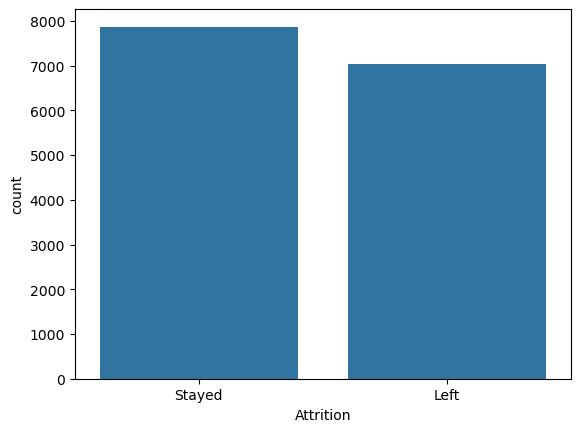

In [9]:
sns.countplot(data=df,x='Attrition')
plt.show()

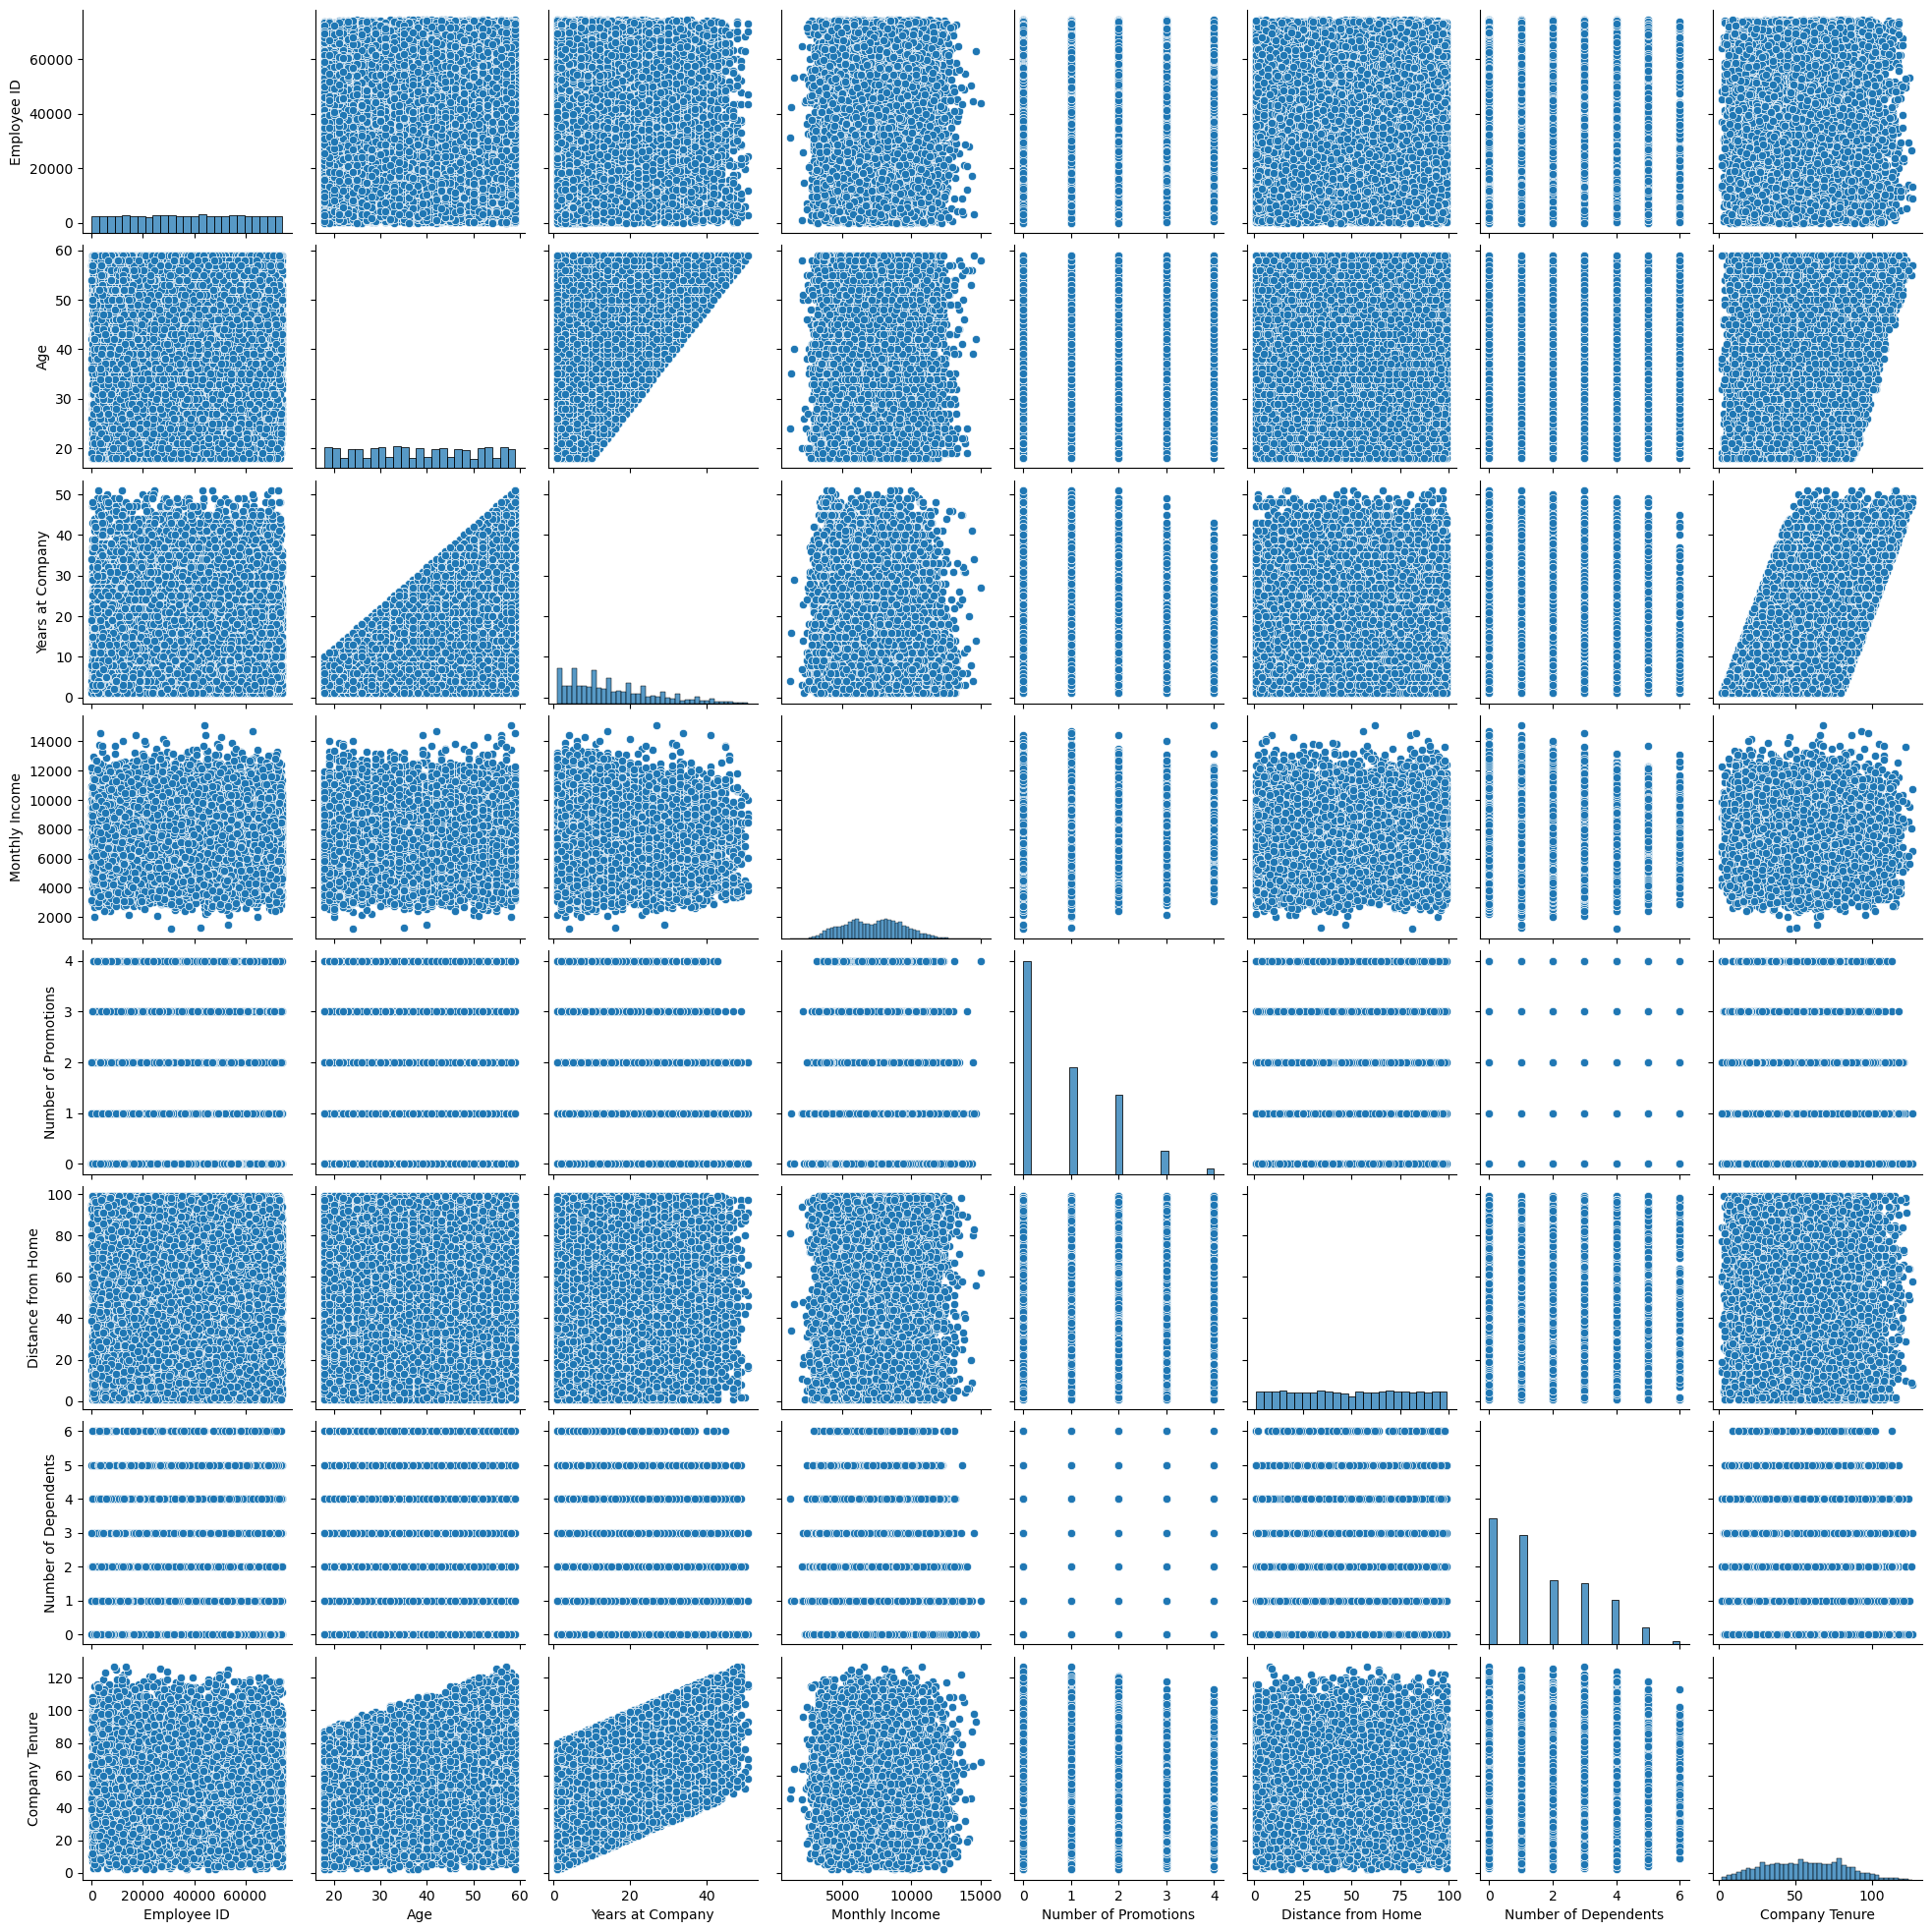

In [10]:
sns.pairplot(df)

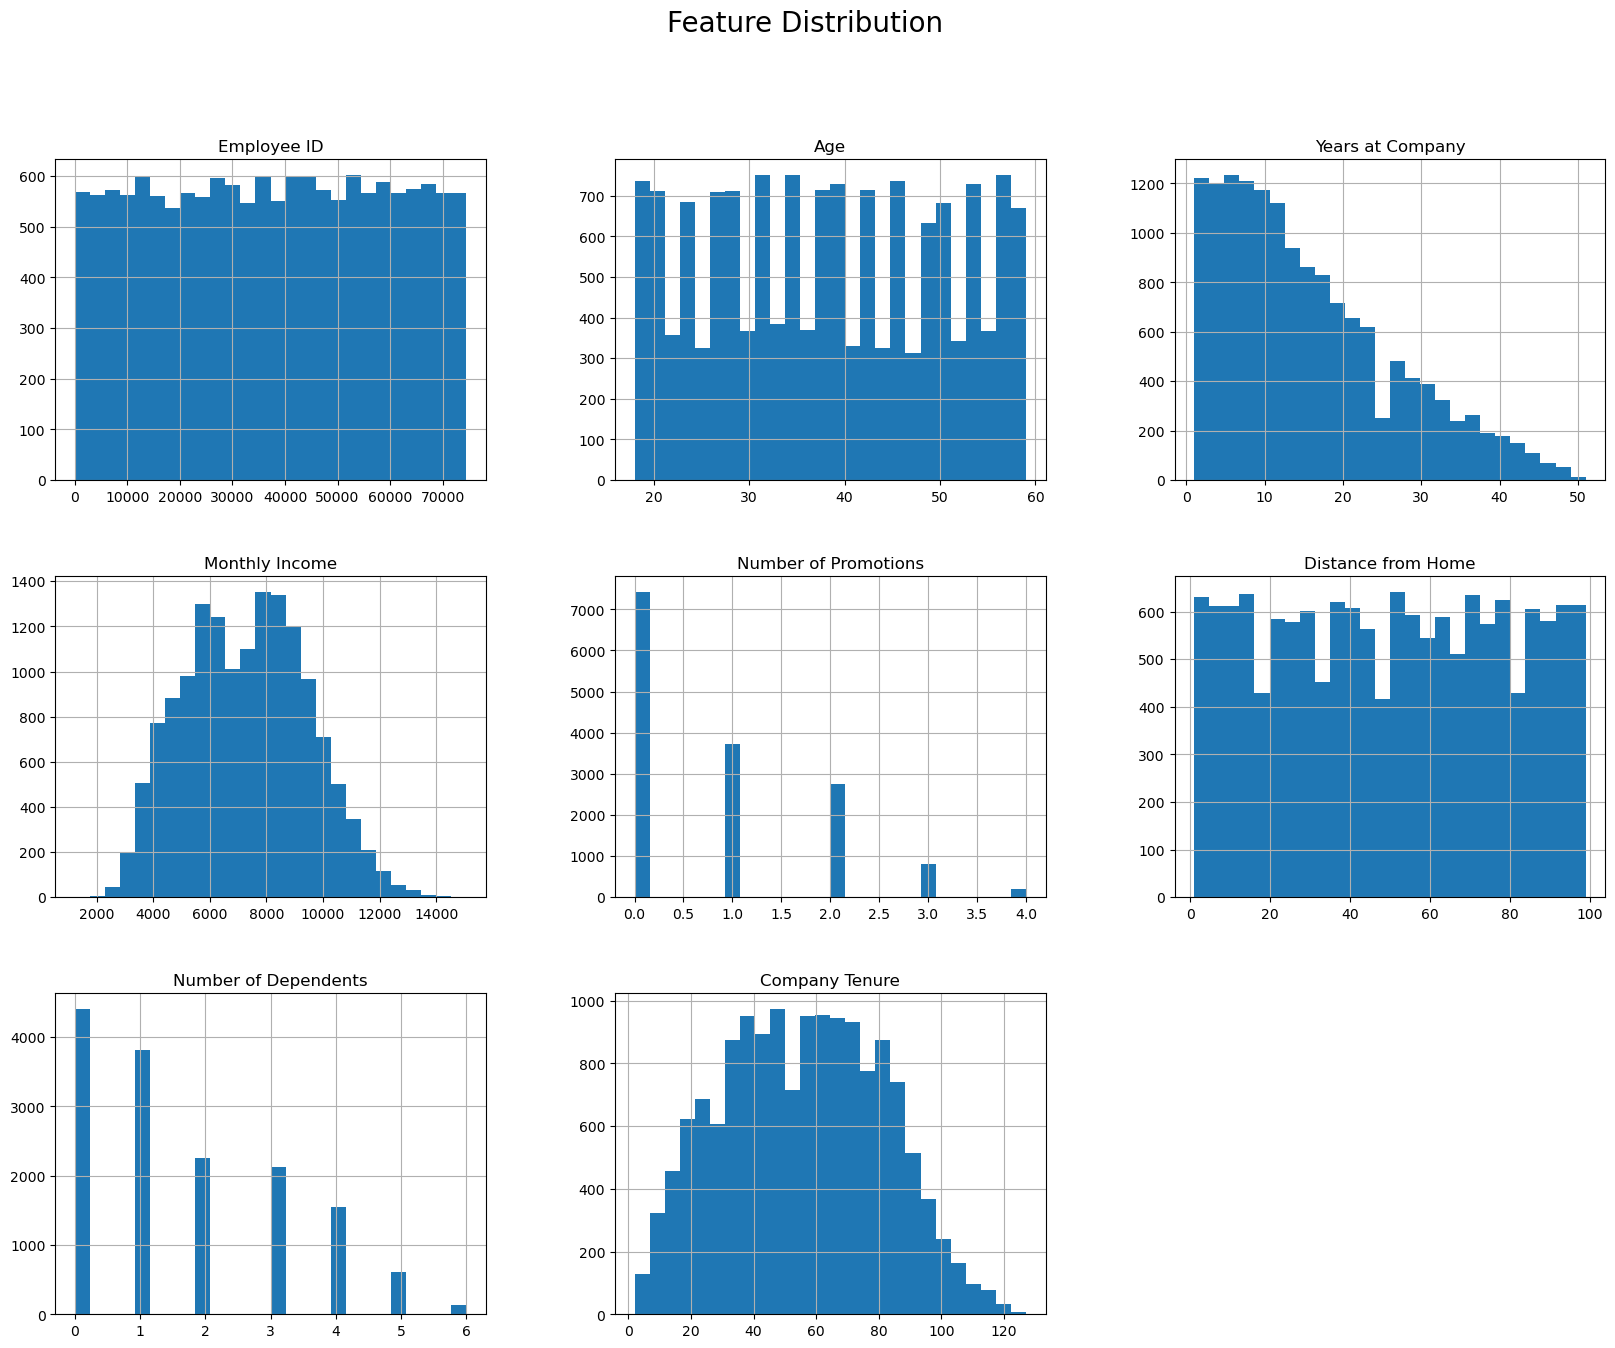

In [11]:
df.hist(figsize=(20, 15), bins=26)
plt.suptitle("Feature Distribution", fontsize=20)
plt.show()

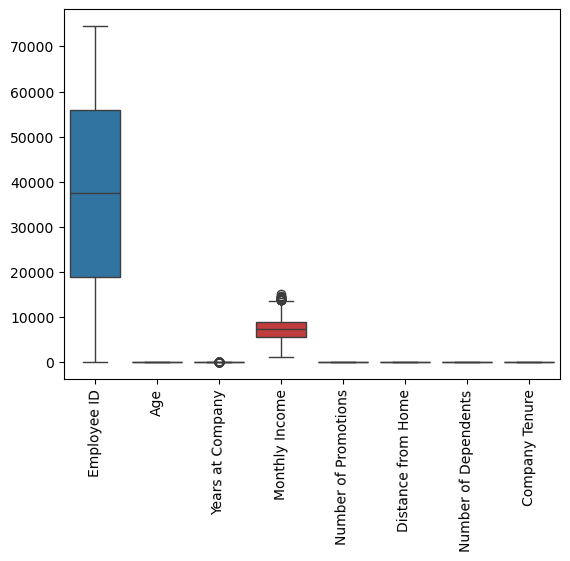

In [12]:
sns.boxplot(df)
plt.xticks(rotation=89.5)
plt.show()

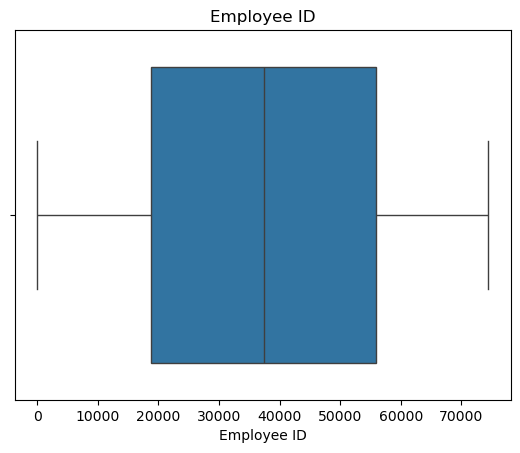

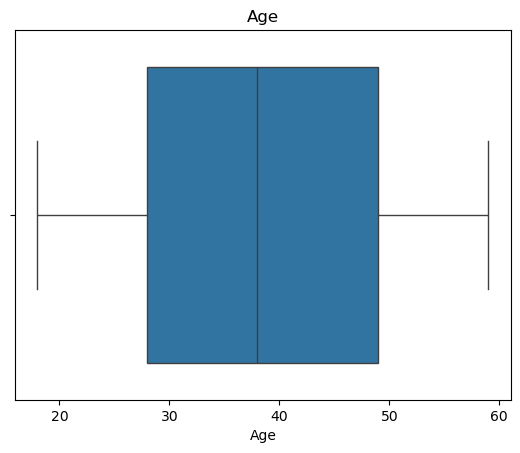

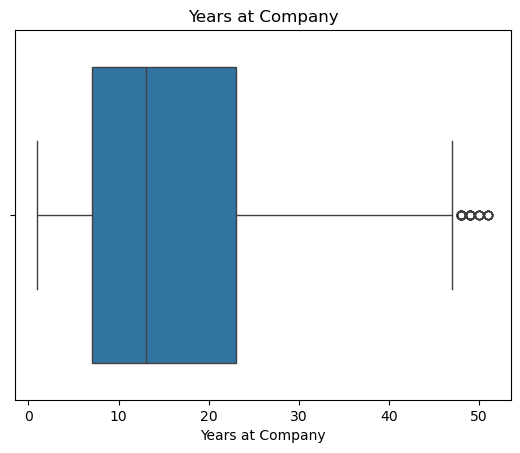

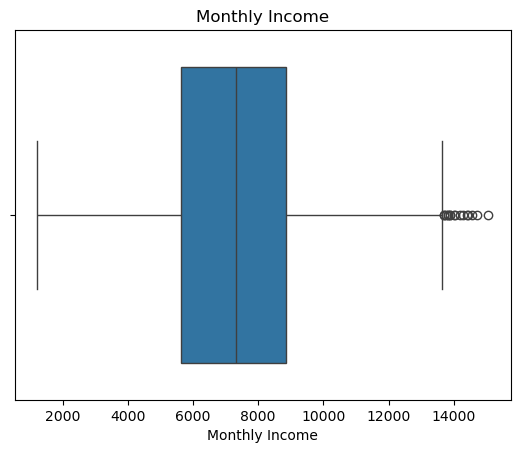

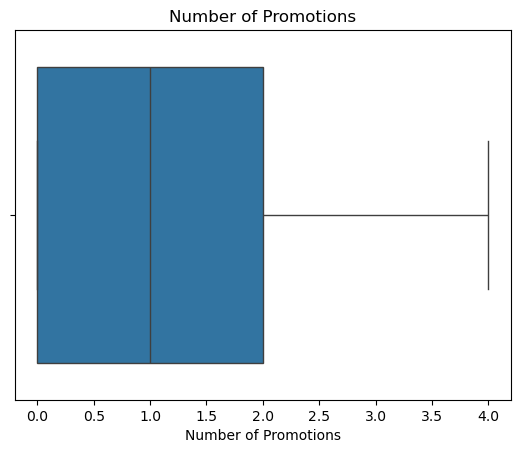

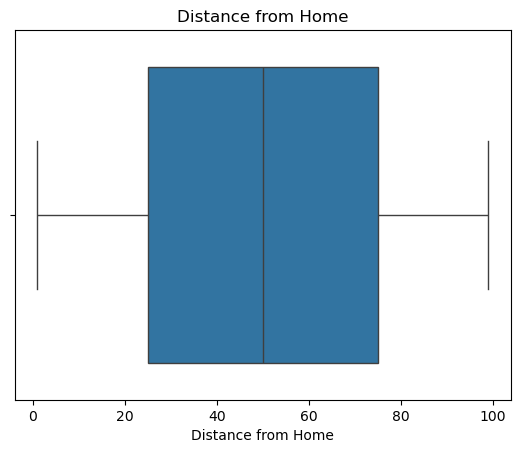

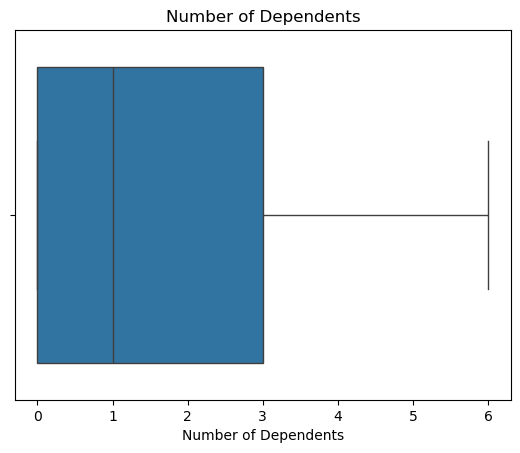

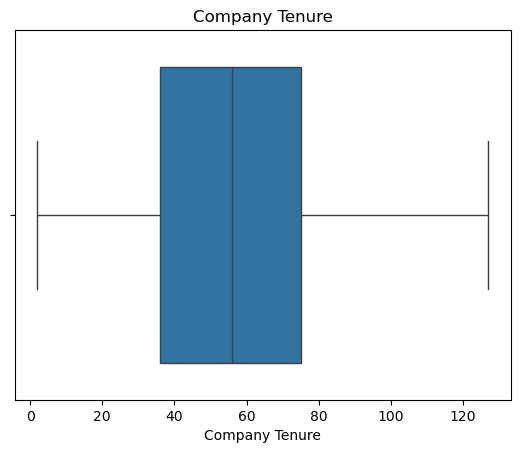

In [13]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

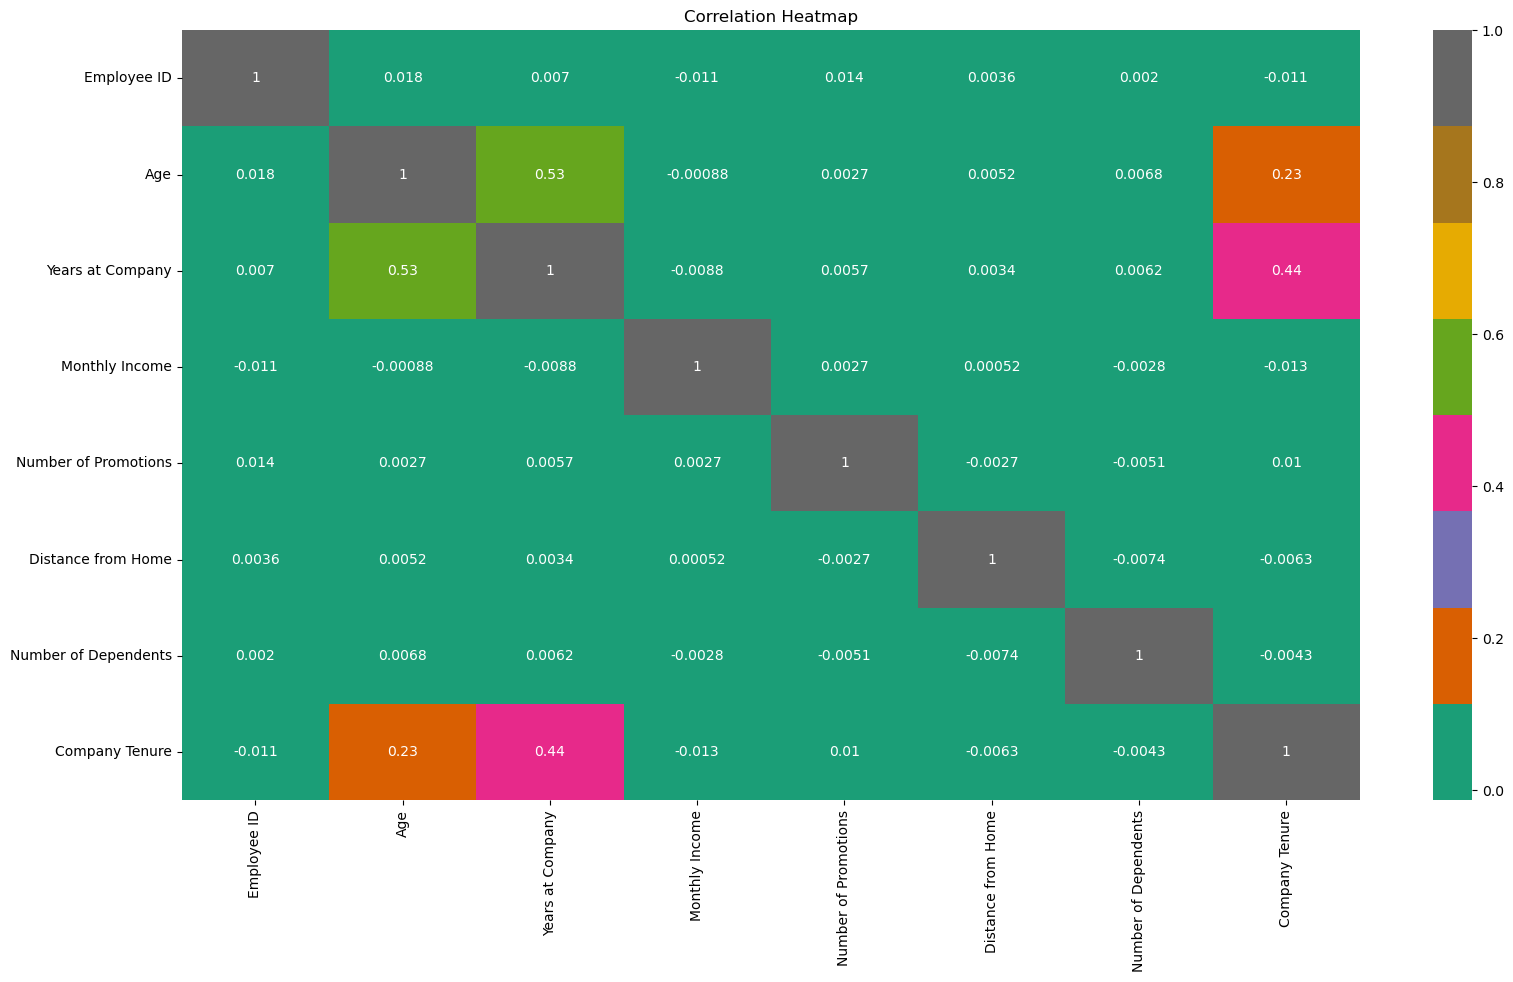

In [14]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Dark2')
plt.title("Correlation Heatmap")
plt.show()

## DATA PREPROCESSING

In [21]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [26]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee ID,14900.0,37339.022081,21453.129293,5.0,18825.50,37433.0,55857.5,74471.0
Age,14900.0,38.385235,12.097904,18.0,28.00,38.0,49.0,59.0
Years at Company,14900.0,15.592416,11.133792,1.0,7.00,13.0,23.0,51.0
Monthly Income,14900.0,7287.306040,2156.737934,1226.0,5633.75,7332.0,8852.0,15063.0
Number of Promotions,14900.0,0.834362,0.996511,0.0,0.00,1.0,2.0,4.0
Distance from Home,14900.0,49.927315,28.702307,1.0,25.00,50.0,75.0,99.0
Number of Dependents,14900.0,1.659329,1.545401,0.0,0.00,1.0,3.0,6.0
Company Tenure,14900.0,55.603624,25.352807,2.0,36.00,56.0,75.0,127.0


In [28]:
df.duplicated().sum()

0

In [29]:
df.value_counts('Attrition')

Attrition
Stayed    7868
Left      7032
Name: count, dtype: int64

In [30]:
df=df.drop(['Employee ID','Company Tenure'],axis=1)
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,...,Married,1,Mid,Large,No,No,No,Poor,Medium,Stayed
1,35,Male,7,Education,4563,Good,High,Average,1,Yes,...,Single,4,Entry,Medium,No,No,No,Good,High,Left
2,50,Male,7,Education,5583,Fair,High,Average,3,Yes,...,Divorced,2,Senior,Medium,No,No,Yes,Good,Low,Stayed
3,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,...,Single,4,Entry,Medium,No,No,No,Poor,Low,Left
4,39,Male,24,Education,4604,Good,High,Average,0,Yes,...,Married,6,Mid,Large,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,Yes,...,Single,0,Senior,Medium,No,No,No,Poor,Medium,Stayed
14896,30,Female,15,Education,3856,Good,Medium,Average,2,Yes,...,Married,0,Entry,Medium,No,No,No,Good,Medium,Left
14897,52,Male,5,Education,5654,Good,Very High,Below Average,0,No,...,Married,4,Mid,Small,No,No,No,Good,High,Left
14898,18,Male,4,Education,5276,Fair,High,Average,0,No,...,Divorced,3,Mid,Large,No,No,No,Poor,High,Stayed


## LABEL ENCODING

In [44]:
le=LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [46]:
le1=LabelEncoder()
df['Job Role'] = le1.fit_transform(df['Job Role'])

In [48]:
le2=LabelEncoder()
df['Work-Life Balance'] = le2.fit_transform(df['Work-Life Balance'])

In [50]:
le3=LabelEncoder()
df['Job Satisfaction'] = le3.fit_transform(df['Job Satisfaction'])

In [52]:
le4=LabelEncoder()
df['Performance Rating'] = le4.fit_transform(df['Performance Rating'])

In [54]:
le5=LabelEncoder()
df['Overtime'] = le5.fit_transform(df['Overtime'])

In [56]:
le6=LabelEncoder()
df['Education Level'] = le6.fit_transform(df['Education Level'])

In [58]:
le7=LabelEncoder()
df['Marital Status'] = le7.fit_transform(df['Marital Status'])

In [60]:
le8=LabelEncoder()
df['Job Level'] = le8.fit_transform(df['Job Level'])

In [62]:
le9=LabelEncoder()
df['Company Size'] = le9.fit_transform(df['Company Size'])

In [64]:
le10=LabelEncoder()
df['Remote Work'] = le10.fit_transform(df['Remote Work'])

In [66]:
le11=LabelEncoder()
df['Leadership Opportunities'] = le11.fit_transform(df['Leadership Opportunities'])

In [68]:
le12=LabelEncoder()
df['Innovation Opportunities'] = le12.fit_transform(df['Innovation Opportunities'])

In [70]:
le13=LabelEncoder()
df['Company Reputation'] = le13.fit_transform(df['Company Reputation'])

In [72]:
le14=LabelEncoder()
df['Employee Recognition'] = le14.fit_transform(df['Employee Recognition'])

In [74]:
le15=LabelEncoder()
df['Attrition'] = le15.fit_transform(df['Attrition'])

In [76]:
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,36,1,13,2,8029,0,0,0,1,1,...,1,1,1,0,0,0,0,3,2,1
1,35,1,7,0,4563,2,0,0,1,1,...,2,4,0,1,0,0,0,2,0,0
2,50,1,7,0,5583,1,0,0,3,1,...,0,2,2,1,0,0,1,2,1,1
3,58,1,44,3,5525,1,3,2,0,1,...,2,4,0,1,0,0,0,3,1,0
4,39,1,24,0,4604,2,0,0,0,1,...,1,6,1,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,56,0,42,2,7830,3,2,0,0,1,...,2,0,2,1,0,0,0,3,2,1
14896,30,0,15,0,3856,2,2,0,2,1,...,1,0,0,1,0,0,0,2,2,0
14897,52,1,5,0,5654,2,3,1,0,0,...,1,4,1,2,0,0,0,2,0,0
14898,18,1,4,0,5276,1,0,0,0,0,...,0,3,1,0,0,0,0,3,0,1


## OUTLIER REMOVING

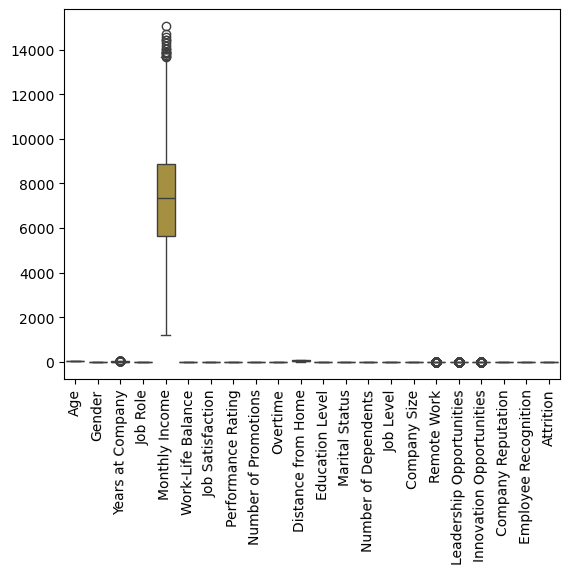

In [79]:
# outlier detection
sns.boxplot(df)
plt.xticks(rotation=89.5)
plt.show()

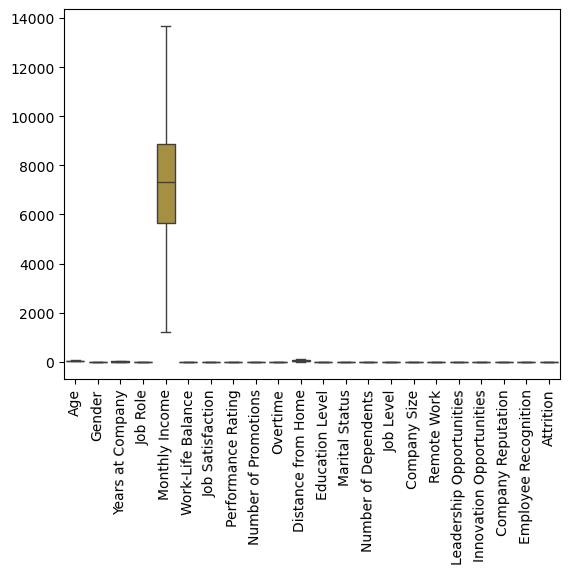

In [80]:
# outlier treating
lst=['Years at Company','Monthly Income','Remote Work','Leadership Opportunities','Innovation Opportunities']
for i in lst:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  df.loc[(df[i]>=upper_limit),i]=upper_limit
  df.loc[(df[i]<=lower_limit),i]=lower_limit
sns.boxplot(df)
plt.xticks(rotation=89.5)
plt.show()

In [81]:
x=df.drop('Attrition',axis=1)
y=df[['Attrition']]

# x=df.iloc[:,:-1]
# y=df.iloc[:,-1]

In [83]:
x

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,36,1,13,2,8029.0,0,0,0,1,1,...,3,1,1,1,0,0,0,0,3,2
1,35,1,7,0,4563.0,2,0,0,1,1,...,0,2,4,0,1,0,0,0,2,0
2,50,1,7,0,5583.0,1,0,0,3,1,...,0,0,2,2,1,0,0,0,2,1
3,58,1,44,3,5525.0,1,3,2,0,1,...,3,2,4,0,1,0,0,0,3,1
4,39,1,24,0,4604.0,2,0,0,0,1,...,3,1,6,1,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,56,0,42,2,7830.0,3,2,0,0,1,...,0,2,0,2,1,0,0,0,3,2
14896,30,0,15,0,3856.0,2,2,0,2,1,...,3,1,0,0,1,0,0,0,2,2
14897,52,1,5,0,5654.0,2,3,1,0,0,...,0,1,4,1,2,0,0,0,2,0
14898,18,1,4,0,5276.0,1,0,0,0,0,...,1,0,3,1,0,0,0,0,3,0


In [84]:
y

,Attrition
0,1
1,0
2,1
3,0
4,1
...,...
14895,1
14896,0
14897,0
14898,1


## SCALING

In [90]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

## TRAIN TEST SPLIT

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60)

## MODEL FITTING

### LOGISTIC REGRESSION

Test score: 0.6852361787756831
train score: 0.6941443486155243
CR:               precision    recall  f1-score   support

           0       0.68      0.70      0.69      2372
           1       0.69      0.67      0.68      2349

    accuracy                           0.69      4721
   macro avg       0.69      0.69      0.69      4721
weighted avg       0.69      0.69      0.69      4721

Test accuracy: 68.52361787756831
Train accuracy: 69.41443486155244


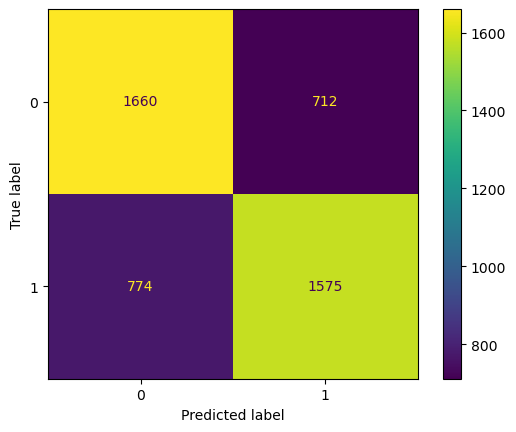

In [303]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test score:',lr.score(x_test,y_test))
print('train score:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrt=accuracy_score(y_test,y_testpred)*100
lrr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrt)
print('Train accuracy:',lrr)

### RANDOM FOREST CLASSIFIER

Test accuracy: 0.6776106757042999
train accuracy: 0.9665002269632319
CR:               precision    recall  f1-score   support

           0       0.68      0.67      0.68      2372
           1       0.67      0.68      0.68      2349

    accuracy                           0.68      4721
   macro avg       0.68      0.68      0.68      4721
weighted avg       0.68      0.68      0.68      4721

Test accuracy: 67.76106757042999
Train accuracy: 96.65002269632319


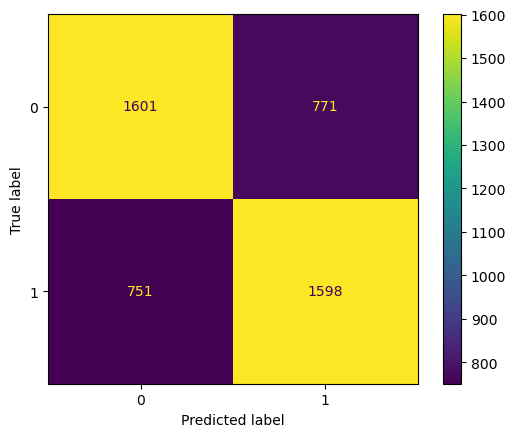

In [305]:
rf=RandomForestClassifier(n_estimators=5,random_state=10)
rf.fit(x_train,y_train)
y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rft=accuracy_score(y_test,y_testpred)*100
rfr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rft)
print('Train accuracy:',rfr)

### XG BOOST

Test accuracy: 0.729930099555179
train accuracy: 0.9349977303676804
CR:               precision    recall  f1-score   support

           0       0.73      0.73      0.73      2372
           1       0.73      0.73      0.73      2349

    accuracy                           0.73      4721
   macro avg       0.73      0.73      0.73      4721
weighted avg       0.73      0.73      0.73      4721

Test accuracy: 72.99300995551789
Train accuracy: 93.49977303676805


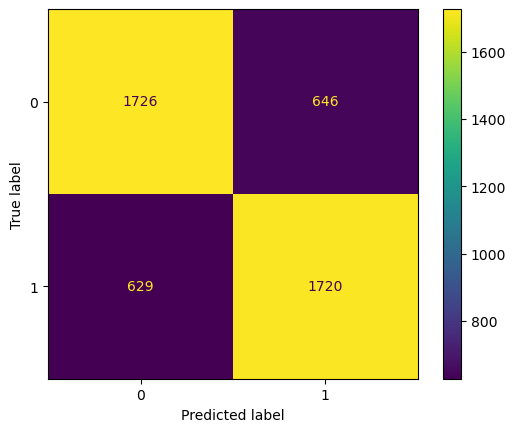

In [307]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test accuracy:',xgb.score(x_test,y_test))
print('train accuracy:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgt=accuracy_score(y_test,y_testpred)*100
xgr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgt)
print('Train accuracy:',xgr)

### SVM

Test score: 0.7066299512815082
train score: 0.777666817975488
CR:               precision    recall  f1-score   support

           0       0.70      0.72      0.71      2372
           1       0.71      0.69      0.70      2349

    accuracy                           0.71      4721
   macro avg       0.71      0.71      0.71      4721
weighted avg       0.71      0.71      0.71      4721

Test accuracy: 70.66299512815081
Train accuracy: 77.7666817975488


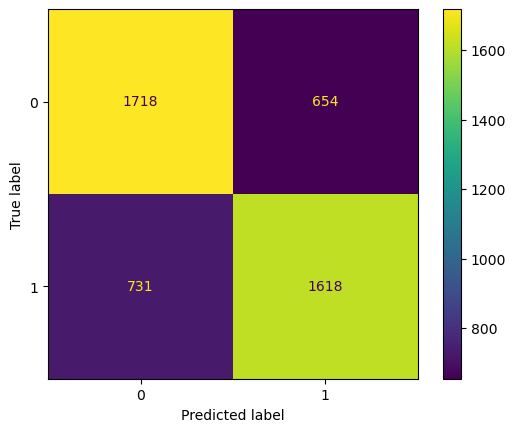

In [309]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_testpred=sv.predict(x_test)
y_trainpred=sv.predict(x_train)
print('Test score:',sv.score(x_test,y_test))
print('train score:',sv.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svt=accuracy_score(y_test,y_testpred)*100
svr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svt)
print('Train accuracy:',svr)

### NAIVE BAYES

Test accuracy: 0.6934971404363482
train accuracy: 0.7004993191103042
CR:               precision    recall  f1-score   support

           0       0.69      0.72      0.70      2372
           1       0.70      0.67      0.68      2349

    accuracy                           0.69      4721
   macro avg       0.69      0.69      0.69      4721
weighted avg       0.69      0.69      0.69      4721

Test accuracy: 69.34971404363482
Train accuracy: 70.04993191103041


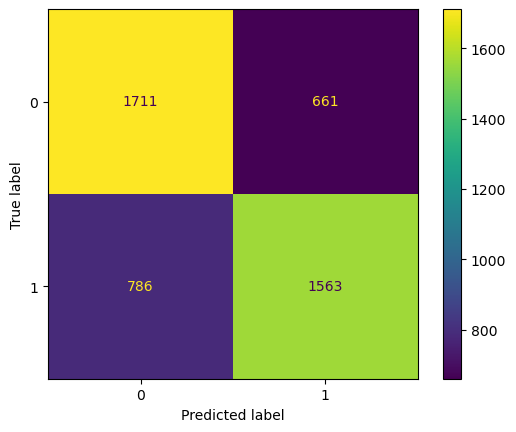

In [310]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_testpred=gnb.predict(x_test)
y_trainpred=gnb.predict(x_train)
print('Test accuracy:',gnb.score(x_test,y_test))
print('train accuracy:',gnb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gnbt=accuracy_score(y_test,y_testpred)*100
gnbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gnbt)
print('Train accuracy:',gnbr)

### KNN

Test accuracy: 0.6386358822283414
train accuracy: 0.8167044938719927
CR:               precision    recall  f1-score   support

           0       0.63      0.67      0.65      2372
           1       0.65      0.61      0.63      2349

    accuracy                           0.64      4721
   macro avg       0.64      0.64      0.64      4721
weighted avg       0.64      0.64      0.64      4721

Test accuracy: 63.863588222834146
Train accuracy: 81.67044938719927


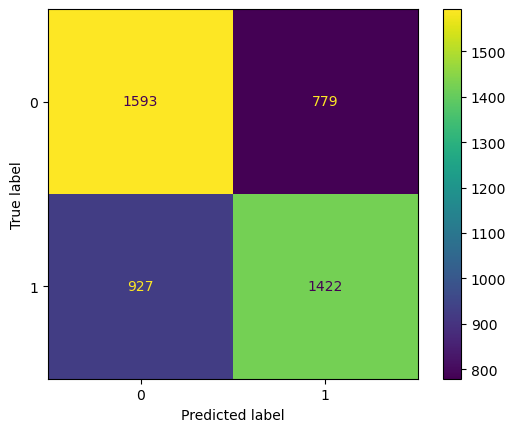

In [311]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnt=accuracy_score(y_test,y_testpred)*100
knnr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnt)
print('Train accuracy:',knnr)

### ADABOOST

Test accuracy: 0.6773988561745393
train accuracy: 0.6896958692691784
CR:               precision    recall  f1-score   support

           0       0.66      0.73      0.69      2372
           1       0.69      0.63      0.66      2349

    accuracy                           0.68      4721
   macro avg       0.68      0.68      0.68      4721
weighted avg       0.68      0.68      0.68      4721

Test accuracy: 67.73988561745394
Train accuracy: 68.96958692691784


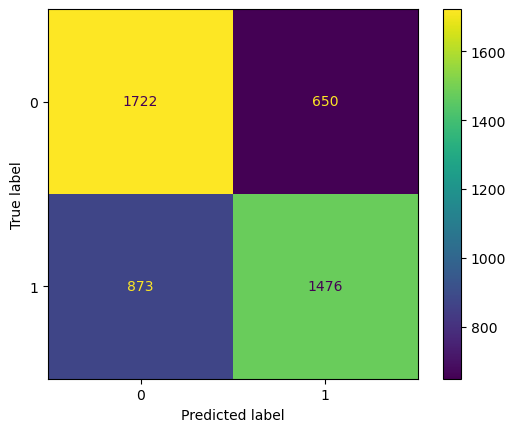

In [312]:
adaboost=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=5)
adaboost.fit(x_train,y_train)
y_testpred=adaboost.predict(x_test)
y_trainpred=adaboost.predict(x_train)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adt=accuracy_score(y_test,y_testpred)*100
adr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adt)
print('Train accuracy:',adr)

### GRADIENT BOOSTING

Test accuracy: 0.7301419190849396
train accuracy: 0.7524285065819337
CR:               precision    recall  f1-score   support

           0       0.73      0.73      0.73      2372
           1       0.73      0.73      0.73      2349

    accuracy                           0.73      4721
   macro avg       0.73      0.73      0.73      4721
weighted avg       0.73      0.73      0.73      4721

Test accuracy: 73.01419190849397
Train accuracy: 75.24285065819338


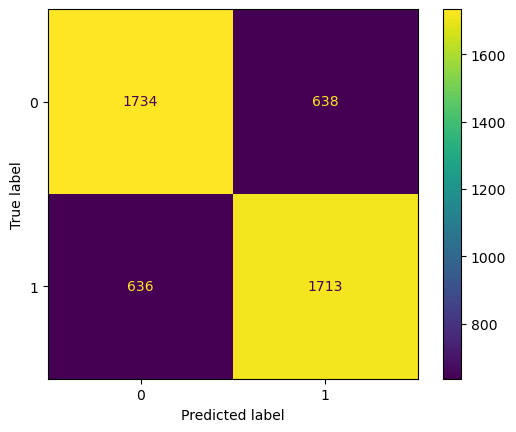

In [313]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_testpred=gbc.predict(x_test)
y_trainpred=gbc.predict(x_train)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbct=accuracy_score(y_test,y_testpred)*100
gbcr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbct)
print('Train accuracy:',gbcr)

### DECISION TREE

Test accuracy: 0.6566405422579962
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.66      0.65      0.66      2372
           1       0.65      0.66      0.66      2349

    accuracy                           0.66      4721
   macro avg       0.66      0.66      0.66      4721
weighted avg       0.66      0.66      0.66      4721

Test accuracy: 65.66405422579962
Train accuracy: 100.0


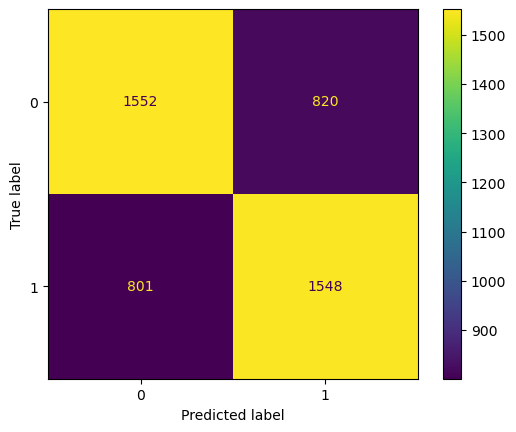

In [315]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtt=accuracy_score(y_test,y_testpred)*100
dtr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtt)
print('Train accuracy:',dtr)

## INITIAL PERFORMANCE

In [118]:
tb=pd.DataFrame()
tb['model']=pd.Series(['lr','rf','xgb','sv','gnb','knn','adaboost','gbc','dt'])
tb['test_accuracy']=pd.Series([lrt,rft,xgt,svt,gnbt,knnt,adt,gbct,dtt])
tb['train_accuracy']=pd.Series([lrr,rfr,xgr,svr,gnbr,knnr,adr,gbcr,dtr])
tb

,model,test_accuracy,train_accuracy
0,lr,68.322148,69.117929
1,rf,66.823266,96.845638
2,xgb,71.968680,93.441994
3,sv,69.172260,77.545542
4,gnb,69.060403,70.191755
5,knn,62.460850,80.517737
6,adaboost,66.957494,68.322148
7,gbc,72.147651,73.873442
8,dt,64.071588,100.000000


In [119]:
df.value_counts('Attrition')

Attrition
1    7868
0    7032
Name: count, dtype: int64

## BALANCING OF DATA

In [121]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
y_resampled.value_counts()

Attrition
0            7868
1            7868
Name: count, dtype: int64

In [122]:
y_resampled

,Attrition
0,1
1,0
2,1
3,0
4,1
...,...
15731,0
15732,0
15733,0
15734,0


In [123]:
x_resampled

array([[-0.19716763,  0.91785795, -0.23262539, ...,  0.        ,
         1.36200842,  0.99075117],
       [-0.27982935,  0.91785795, -0.77265941, ...,  0.        ,
         0.21240634, -1.35879402],
       [ 0.96009651,  0.91785795, -0.77265941, ...,  0.        ,
         0.21240634, -0.18402143],
       ...,
       [ 1.20799949, -1.08949321,  1.47748232, ...,  0.        ,
         0.97918873, -0.18402143],
       [ 0.05081754, -1.08949321,  0.45691039, ...,  0.        ,
         0.98204993, -1.35879402],
       [ 0.95961205, -1.07772885,  2.01646136, ...,  0.        ,
         1.35527101, -0.18402143]])

In [124]:
df_resampled = y_resampled.rename(columns={y_resampled.columns[0]: 'label'})

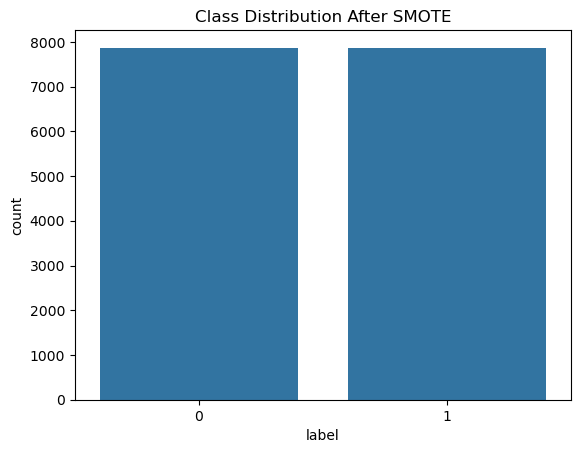

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_resampled = pd.DataFrame({'label': y_resampled.ravel()})  # Ensure 1D
sns.countplot(data=df_resampled, x='label')
plt.title("Class Distribution After SMOTE")
plt.show()

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=60)

### LOGISTIC REGRESSION

Test score: 0.6852361787756831
train score: 0.6941443486155243
CR:               precision    recall  f1-score   support

           0       0.68      0.70      0.69      2372
           1       0.69      0.67      0.68      2349

    accuracy                           0.69      4721
   macro avg       0.69      0.69      0.69      4721
weighted avg       0.69      0.69      0.69      4721

Test accuracy: 68.52361787756831
Train accuracy: 69.41443486155244


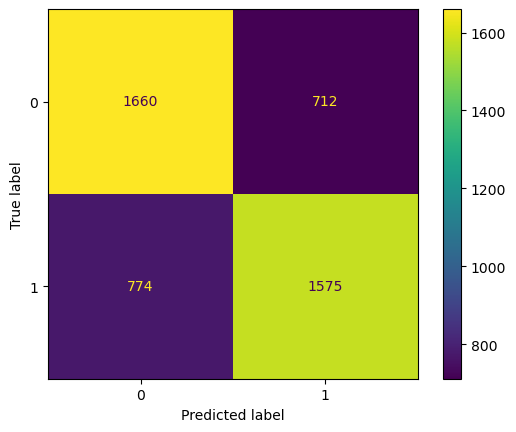

In [128]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test score:',lr.score(x_test,y_test))
print('train score:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrt1=accuracy_score(y_test,y_testpred)*100
lrr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrt1)
print('Train accuracy:',lrr1)

### RANDOM FOREST CLASSIFIER

Test accuracy: 0.6776106757042999
train accuracy: 0.9665002269632319
CR:               precision    recall  f1-score   support

           0       0.68      0.67      0.68      2372
           1       0.67      0.68      0.68      2349

    accuracy                           0.68      4721
   macro avg       0.68      0.68      0.68      4721
weighted avg       0.68      0.68      0.68      4721

Test accuracy: 67.76106757042999
Train accuracy: 96.65002269632319


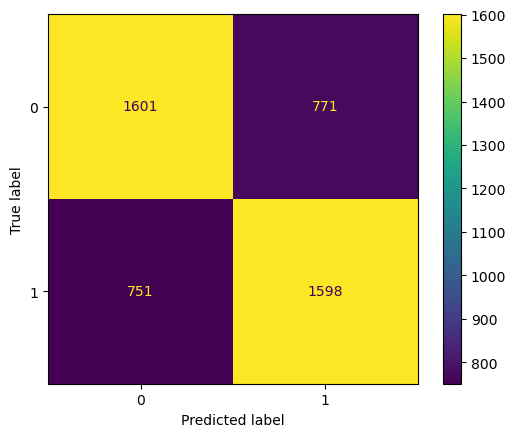

In [130]:
rf=RandomForestClassifier(n_estimators=5,random_state=10)
rf.fit(x_train,y_train)
y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rft1=accuracy_score(y_test,y_testpred)*100
rfr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rft1)
print('Train accuracy:',rfr1)

### XG BOOST

Test accuracy: 0.729930099555179
train accuracy: 0.9349977303676804
CR:               precision    recall  f1-score   support

           0       0.73      0.73      0.73      2372
           1       0.73      0.73      0.73      2349

    accuracy                           0.73      4721
   macro avg       0.73      0.73      0.73      4721
weighted avg       0.73      0.73      0.73      4721

Test accuracy: 72.99300995551789
Train accuracy: 93.49977303676805


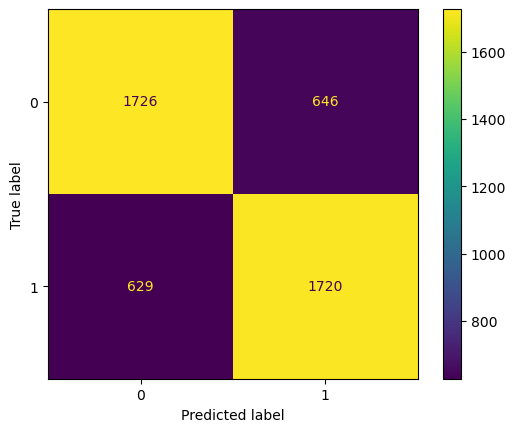

In [132]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test accuracy:',xgb.score(x_test,y_test))
print('train accuracy:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgt1=accuracy_score(y_test,y_testpred)*100
xgr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgt1)
print('Train accuracy:',xgr1)

### SVM

Test score: 0.7066299512815082
train score: 0.777666817975488
CR:               precision    recall  f1-score   support

           0       0.70      0.72      0.71      2372
           1       0.71      0.69      0.70      2349

    accuracy                           0.71      4721
   macro avg       0.71      0.71      0.71      4721
weighted avg       0.71      0.71      0.71      4721

Test accuracy: 70.66299512815081
Train accuracy: 77.7666817975488


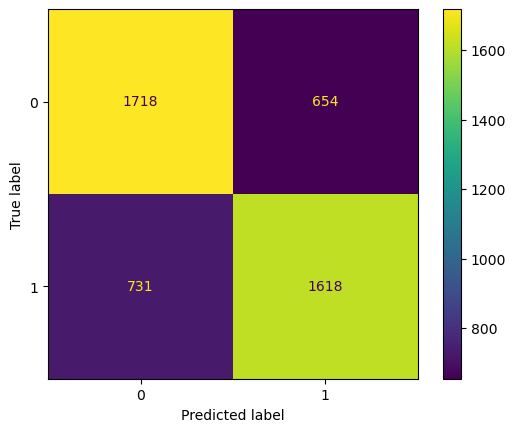

In [134]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_testpred=sv.predict(x_test)
y_trainpred=sv.predict(x_train)
print('Test score:',sv.score(x_test,y_test))
print('train score:',sv.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svt1=accuracy_score(y_test,y_testpred)*100
svr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svt1)
print('Train accuracy:',svr1)

### NAIVE BAYES

Test accuracy: 0.6934971404363482
train accuracy: 0.7004993191103042
CR:               precision    recall  f1-score   support

           0       0.69      0.72      0.70      2372
           1       0.70      0.67      0.68      2349

    accuracy                           0.69      4721
   macro avg       0.69      0.69      0.69      4721
weighted avg       0.69      0.69      0.69      4721

Test accuracy: 69.34971404363482
Train accuracy: 70.04993191103041


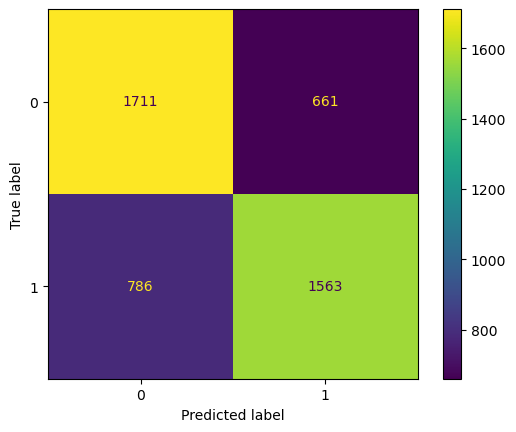

In [136]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_testpred=gnb.predict(x_test)
y_trainpred=gnb.predict(x_train)
print('Test accuracy:',gnb.score(x_test,y_test))
print('train accuracy:',gnb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gnbt1=accuracy_score(y_test,y_testpred)*100
gnbr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gnbt1)
print('Train accuracy:',gnbr1)

### KNN

Test accuracy: 0.6386358822283414
train accuracy: 0.8167044938719927
CR:               precision    recall  f1-score   support

           0       0.63      0.67      0.65      2372
           1       0.65      0.61      0.63      2349

    accuracy                           0.64      4721
   macro avg       0.64      0.64      0.64      4721
weighted avg       0.64      0.64      0.64      4721

Test accuracy: 63.863588222834146
Train accuracy: 81.67044938719927


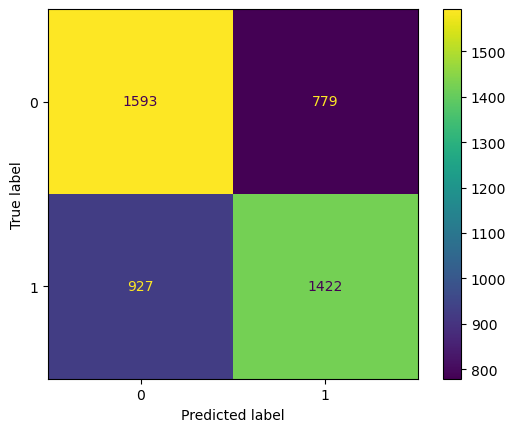

In [138]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnt1=accuracy_score(y_test,y_testpred)*100
knnr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnt1)
print('Train accuracy:',knnr1)

### ADABOOST

Test accuracy: 0.6773988561745393
train accuracy: 0.6896958692691784
CR:               precision    recall  f1-score   support

           0       0.66      0.73      0.69      2372
           1       0.69      0.63      0.66      2349

    accuracy                           0.68      4721
   macro avg       0.68      0.68      0.68      4721
weighted avg       0.68      0.68      0.68      4721

Test accuracy: 67.73988561745394
Train accuracy: 68.96958692691784


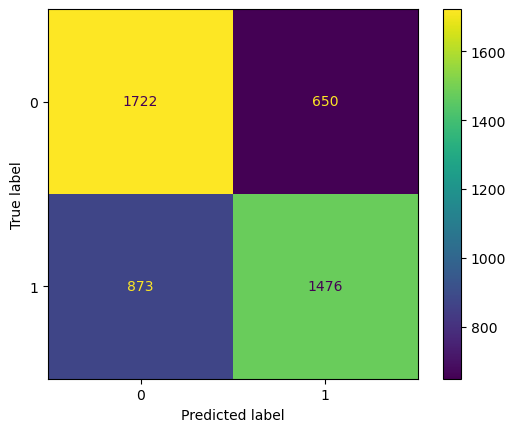

In [140]:
adaboost=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=5)
adaboost.fit(x_train,y_train)
y_testpred=adaboost.predict(x_test)
y_trainpred=adaboost.predict(x_train)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adt1=accuracy_score(y_test,y_testpred)*100
adr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adt1)
print('Train accuracy:',adr1)

### GRADIENT BOOSTING

Test accuracy: 0.7301419190849396
train accuracy: 0.7524285065819337
CR:               precision    recall  f1-score   support

           0       0.73      0.73      0.73      2372
           1       0.73      0.73      0.73      2349

    accuracy                           0.73      4721
   macro avg       0.73      0.73      0.73      4721
weighted avg       0.73      0.73      0.73      4721

Test accuracy: 73.01419190849397
Train accuracy: 75.24285065819338


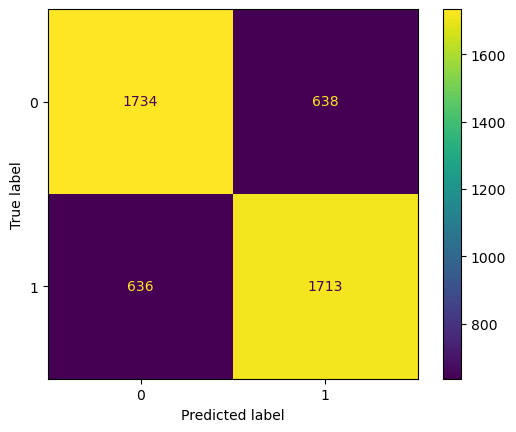

In [142]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_testpred=gbc.predict(x_test)
y_trainpred=gbc.predict(x_train)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbct1=accuracy_score(y_test,y_testpred)*100
gbcr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbct1)
print('Train accuracy:',gbcr1)

### DECISION TREE

Test accuracy: 0.6560050836687142
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.66      0.65      0.66      2372
           1       0.65      0.66      0.66      2349

    accuracy                           0.66      4721
   macro avg       0.66      0.66      0.66      4721
weighted avg       0.66      0.66      0.66      4721

Test accuracy: 65.60050836687142
Train accuracy: 100.0


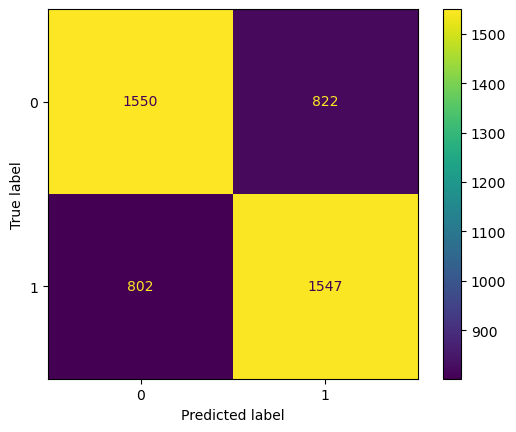

In [144]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtt1=accuracy_score(y_test,y_testpred)*100
dtr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtt1)
print('Train accuracy:',dtr1)

## PERFORMANCE AFTER OVERSAMPLING

In [146]:
tb=pd.DataFrame()
tb['model']=pd.Series(['lr','rf','xgb','sv','gnb','knn','adaboost','gbc','dt'])
tb['test_accuracy']=pd.Series([lrt,rft,xgt,svt,gnbt,knnt,adt,gbct,dtt])
tb['train_accuracy']=pd.Series([lrr,rfr,xgr,svr,gnbr,knnr,adr,gbcr,dtr])
tb['test_accuracy_oversampling']=pd.Series([lrt1,rft1,xgt1,svt1,gnbt1,knnt1,adt1,gbct1,dtt1])
tb['train_accuracy_oversampling']=pd.Series([lrr1,rfr1,xgr1,svr1,gnbr1,knnr1,adr1,gbcr1,dtr1])
tb

,model,test_accuracy,train_accuracy,test_accuracy_oversampling,train_accuracy_oversampling
0,lr,68.322148,69.117929,68.523618,69.414435
1,rf,66.823266,96.845638,67.761068,96.650023
2,xgb,71.968680,93.441994,72.993010,93.499773
3,sv,69.172260,77.545542,70.662995,77.766682
4,gnb,69.060403,70.191755,69.349714,70.049932
5,knn,62.460850,80.517737,63.863588,81.670449
6,adaboost,66.957494,68.322148,67.739886,68.969587
7,gbc,72.147651,73.873442,73.014192,75.242851
8,dt,64.071588,100.000000,65.600508,100.000000


## HYPERPARAMETER TUNING

In [174]:
par={'max_depth':['None',10,20,30],'max_features':['auto','sqrt','log2']}
rft=GridSearchCV(rf,par,cv=10,scoring='accuracy')
rft.fit(x_train,y_train)
print(rft.best_params_)

{'max_depth': 10, 'max_features': 'sqrt'}


In [175]:
# 1 RANDOM FOREST
rf_params={
    'n_estimators':[10,50,100],
    'max_depth':[2,4,6,None]
}
rf_grid=GridSearchCV(RandomForestClassifier(random_state=42),rf_params,cv=5)
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, None],
                         'n_estimators': [10, 50, 100]})

In [176]:
par={'C':[0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale','auto']}
svp= GridSearchCV(sv,par,cv=5,scoring='accuracy')
svp.fit(x_train, y_train)
print(svp.best_params_)

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [177]:
# 2 SVM
from sklearn.svm import SVC
svm_params={
    'C':[0.1,1,10],
    'kernel':['linear','rbf'],
    'gamma':['scale','auto']   #scale: default value based on features,'auto':uses 1/n_features
}
svm_grid=GridSearchCV(SVC(),svm_params,cv=5)
svm_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [178]:
par={'C':[0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear','lbfgs','saga']}
lrt=GridSearchCV(lr,par,cv=10,scoring='accuracy')
lrt.fit(x_train,y_train)
print(lrt.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [179]:
# 3 LOGISTIC REGRESSION
lr_params={
    'C':[0.1,1,10]
}
lr_grid=GridSearchCV(LogisticRegression(),lr_params,cv=5)
lr_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [180]:
par={'max_depth':[3,5,10],'criterion':['gini','entropy']}
dtt=GridSearchCV(dt,par,cv=10,scoring='accuracy')
dtt.fit(x_train,y_train)
print(dtt.best_params_)

{'criterion': 'gini', 'max_depth': 5}


In [181]:
# 4 DECISION TREE
dt_params={
    'max_depth':[2,4,6,None],
    'criterion':['gini','entropy']
}
dt_grid=GridSearchCV(DecisionTreeClassifier(random_state=42),dt_params,cv=5)
dt_grid.fit(x_train,y_train)   

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, None]})

In [183]:
par={'n_neighbors':[3,5,27,59,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree']}
knt=GridSearchCV(knn,par,cv=10,scoring='accuracy')
knt.fit(x_train,y_train)
print(knt.best_params_)

{'algorithm': 'auto', 'n_neighbors': 59, 'weights': 'distance'}


In [184]:
# 5 KNN
knn_params={
    'n_neighbors':range(1,31),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','minkowski']
}
knn_grid=GridSearchCV(knn,knn_params,cv=5,scoring='accuracy',n_jobs=-1)
knn_grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [218]:
par={'C':[0.1, 1, 10, 100],'penalty':['l1','l2'],'solver':['liblinear','saga']}
xgb= GridSearchCV(xgb,par,cv=5,scoring='accuracy')
xgb.fit(x_train, y_train)
print(xgb.best_params_)


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [208]:
# 6 XGB
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_grid=GridSearchCV(xgb,xgb_param,cv=5,scoring='accuracy',n_jobs=-1)
xgb_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [197]:
par={'n_estimators':[100,200],'max_depth':[3,4,5]}
gbt=GridSearchCV(gbc,par,cv=10,scoring='accuracy')
gbt.fit(x_train,y_train)
print(gbt.best_params_)

{'max_depth': 3, 'n_estimators': 200}


In [198]:
# 7 GRADIENT BOOSTING
gb_param={
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10]
}
gb_grid=GridSearchCV(gbc,gb_param,cv=5,scoring='accuracy',n_jobs=-1)
gb_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  random_state=200),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [199]:
par={'n_estimators':[50,100,150],'learning_rate':[0.01,0.1,1.0]}
adt=GridSearchCV(adaboost,par,cv=10,scoring='accuracy')
adt.fit(x_train,y_train)
print(adt.best_params_)

{'learning_rate': 1.0, 'n_estimators': 50}


In [200]:
# 8 ADABOOST
ada_param_grid={
    'n_estimators':[50,100,200],
    'learning_rate': [0.01,0.1,1]
}
ada_grid=GridSearchCV(AdaBoostClassifier(random_state=42),ada_param_grid,cv=5,scoring='accuracy',n_jobs=-1)
ada_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [201]:
par={'var_smoothing':[1e-9,1e-8,1e-7]}
nbt=GridSearchCV(gnb,par,cv=10,scoring='accuracy')
nbt.fit(x_train,y_train)
print(nbt.best_params_)

{'var_smoothing': 1e-09}


In [202]:
# 9 NAIVE BAYES
gnb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
gnb_grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=10, scoring='accuracy')
gnb_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]},
             scoring='accuracy')

In [222]:
from sklearn.metrics import accuracy_score

models = {
    'Random Forest': rf_grid,
    'SVM': svm_grid,
    'Logistic Regression': lr_grid,
    'Decision Tree': dt_grid,
    'KNN': knn_grid,
    'XGB Classifier': xgb_grid,
    'Gradient Boosting': gb_grid,
    'Adaboost': ada_grid,
    'Naive Bayes': gnb_grid
}

for name, grid in models.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Best Params: {grid.best_params_}")
    print(f"  Accuracy: {acc:.4f}\n")


Random Forest:
  Best Params: {'max_depth': None, 'n_estimators': 100}
  Accuracy: 0.7284

SVM:
  Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
  Accuracy: 0.7056

Logistic Regression:
  Best Params: {'C': 1}
  Accuracy: 0.6852

Decision Tree:
  Best Params: {'criterion': 'gini', 'max_depth': 6}
  Accuracy: 0.6905

KNN:
  Best Params: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}
  Accuracy: 0.6973

XGB Classifier:
  Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
  Accuracy: 0.7412

Gradient Boosting:
  Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
  Accuracy: 0.7445

Adaboost:
  Best Params: {'learning_rate': 1, 'n_estimators': 100}
  Accuracy: 0.7465

Naive Bayes:
  Best Params: {'var_smoothing': 1e-09}
  Accuracy: 0.6935



### LOGISTIC REGRESSION

Test score: 0.6852361787756831
train score: 0.6941443486155243
CR:               precision    recall  f1-score   support

           0       0.68      0.70      0.69      2372
           1       0.69      0.67      0.68      2349

    accuracy                           0.69      4721
   macro avg       0.69      0.69      0.69      4721
weighted avg       0.69      0.69      0.69      4721

Test accuracy: 68.52361787756831
Train accuracy: 69.41443486155244


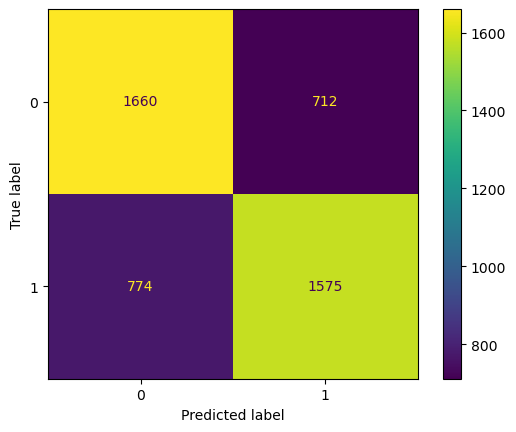

In [233]:
lr=LogisticRegression(C=1)
lr.fit(x_train,y_train)
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test score:',lr.score(x_test,y_test))
print('train score:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrth=accuracy_score(y_test,y_testpred)*100
lrrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrth)
print('Train accuracy:',lrrh)

### RANDOM FOREST

Test accuracy: 0.7276000847278119
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.73      0.73      0.73      2372
           1       0.73      0.73      0.73      2349

    accuracy                           0.73      4721
   macro avg       0.73      0.73      0.73      4721
weighted avg       0.73      0.73      0.73      4721

Test accuracy: 72.7600084727812
Train accuracy: 100.0


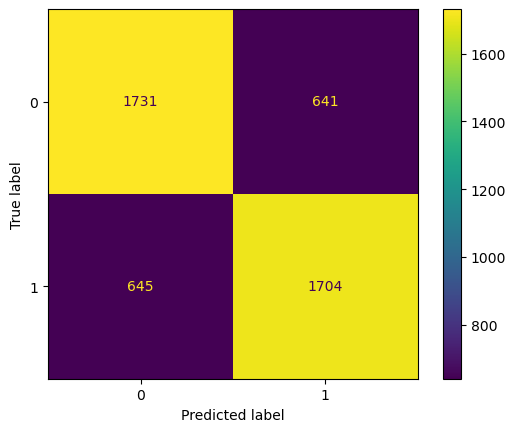

In [241]:
rf=RandomForestClassifier(max_depth=None,n_estimators=100)
rf.fit(x_train,y_train)
y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rfth=accuracy_score(y_test,y_testpred)*100
rfrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rfth)
print('Train accuracy:',rfrh)

### XG BOOST

Test accuracy: 0.7411565346324931
train accuracy: 0.7737630503858375
CR:               precision    recall  f1-score   support

           0       0.74      0.74      0.74      2372
           1       0.74      0.74      0.74      2349

    accuracy                           0.74      4721
   macro avg       0.74      0.74      0.74      4721
weighted avg       0.74      0.74      0.74      4721

Test accuracy: 74.11565346324932
Train accuracy: 77.37630503858375


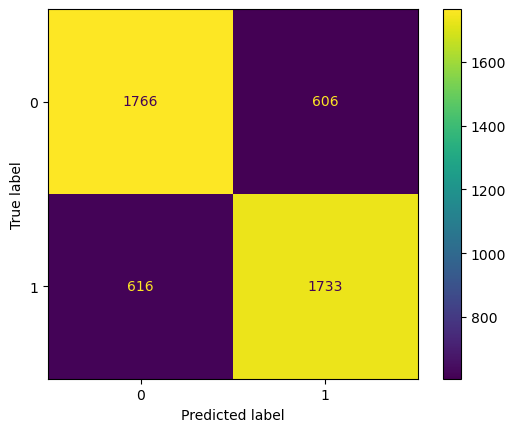

In [245]:
xgb = XGBClassifier(learning_rate=0.2,max_depth=3,min_samples_split=2,n_estimators=100)
xgb.fit(x_train, y_train)
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test accuracy:',xgb.score(x_test,y_test))
print('train accuracy:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgth=accuracy_score(y_test,y_testpred)*100
xgrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgth)
print('Train accuracy:',xgrh)

### SVM

Test score: 0.7055708536327049
train score: 0.7656831593281889
CR:               precision    recall  f1-score   support

           0       0.70      0.73      0.71      2372
           1       0.71      0.68      0.70      2349

    accuracy                           0.71      4721
   macro avg       0.71      0.71      0.71      4721
weighted avg       0.71      0.71      0.71      4721

Test accuracy: 70.55708536327049
Train accuracy: 76.56831593281889


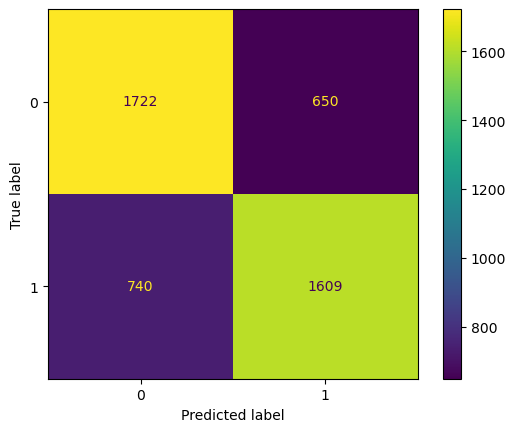

In [247]:
sv=SVC(C=1,gamma='auto',kernel='rbf')
sv.fit(x_train,y_train)
y_testpred=sv.predict(x_test)
y_trainpred=sv.predict(x_train)
print('Test score:',sv.score(x_test,y_test))
print('train score:',sv.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svth=accuracy_score(y_test,y_testpred)*100
svrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svth)
print('Train accuracy:',svrh)

### NAIVE BAYES

Test accuracy: 0.6934971404363482
train accuracy: 0.7004993191103042
CR:               precision    recall  f1-score   support

           0       0.69      0.72      0.70      2372
           1       0.70      0.67      0.68      2349

    accuracy                           0.69      4721
   macro avg       0.69      0.69      0.69      4721
weighted avg       0.69      0.69      0.69      4721

Test accuracy: 69.34971404363482
Train accuracy: 70.04993191103041


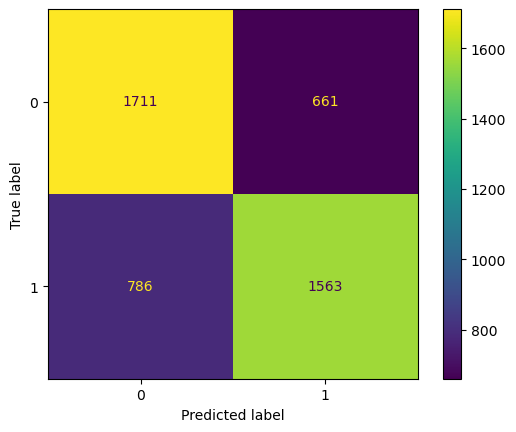

In [249]:
gnb=GaussianNB(var_smoothing=1e-09)
gnb.fit(x_train,y_train)
y_testpred=gnb.predict(x_test)
y_trainpred=gnb.predict(x_train)
print('Test accuracy:',gnb.score(x_test,y_test))
print('train accuracy:',gnb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gnbth=accuracy_score(y_test,y_testpred)*100
gnbrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gnbth)
print('Train accuracy:',gnbrh)

### KNN

Test accuracy: 0.6973098919720399
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.69      0.71      0.70      2372
           1       0.70      0.68      0.69      2349

    accuracy                           0.70      4721
   macro avg       0.70      0.70      0.70      4721
weighted avg       0.70      0.70      0.70      4721

Test accuracy: 69.73098919720398
Train accuracy: 100.0


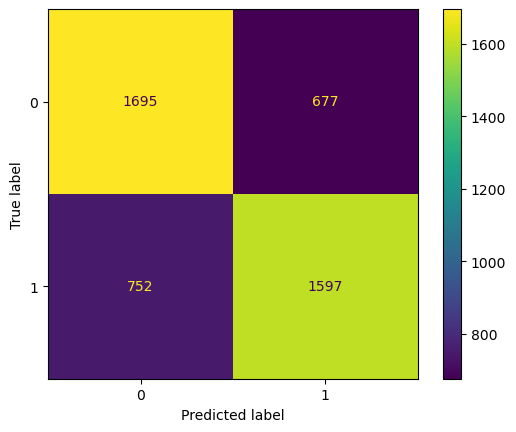

In [251]:
knn=KNeighborsClassifier(metric='manhattan',n_neighbors=29,weights='distance')
knn.fit(x_train,y_train)
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnth=accuracy_score(y_test,y_testpred)*100
knnrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnth)
print('Train accuracy:',knnrh)

### ADABOOST

Test accuracy: 0.7464520228765092
train accuracy: 0.7562414888788016
CR:               precision    recall  f1-score   support

           0       0.75      0.75      0.75      2372
           1       0.75      0.74      0.74      2349

    accuracy                           0.75      4721
   macro avg       0.75      0.75      0.75      4721
weighted avg       0.75      0.75      0.75      4721

Test accuracy: 74.64520228765093
Train accuracy: 75.62414888788015


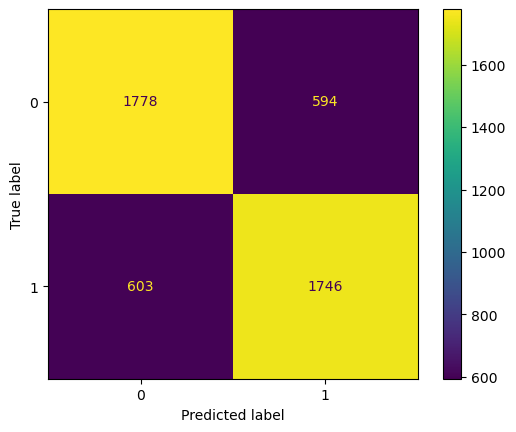

In [253]:
adaboost=AdaBoostClassifier(learning_rate=1,n_estimators=100)
adaboost.fit(x_train,y_train)
y_testpred=adaboost.predict(x_test)
y_trainpred=adaboost.predict(x_train)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adth=accuracy_score(y_test,y_testpred)*100
adrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adth)
print('Train accuracy:',adrh)

### GRADIENT BOOOSTING

Test accuracy: 0.7445456471086634
train accuracy: 0.7765773944620972
CR:               precision    recall  f1-score   support

           0       0.74      0.75      0.75      2372
           1       0.74      0.74      0.74      2349

    accuracy                           0.74      4721
   macro avg       0.74      0.74      0.74      4721
weighted avg       0.74      0.74      0.74      4721

Test accuracy: 74.45456471086635
Train accuracy: 77.65773944620972


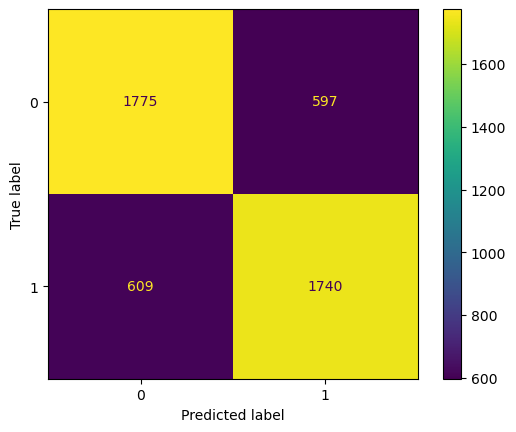

In [255]:
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,min_samples_split=2,n_estimators=200)
gbc.fit(x_train,y_train)
y_testpred=gbc.predict(x_test)
y_trainpred=gbc.predict(x_train)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbcth=accuracy_score(y_test,y_testpred)*100
gbcrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbcth)
print('Train accuracy:',gbcrh)

### DECISION TREE

Test accuracy: 0.6903198474899386
train accuracy: 0.720108942351339
CR:               precision    recall  f1-score   support

           0       0.68      0.74      0.70      2372
           1       0.71      0.64      0.67      2349

    accuracy                           0.69      4721
   macro avg       0.69      0.69      0.69      4721
weighted avg       0.69      0.69      0.69      4721

Test accuracy: 69.03198474899386
Train accuracy: 72.0108942351339


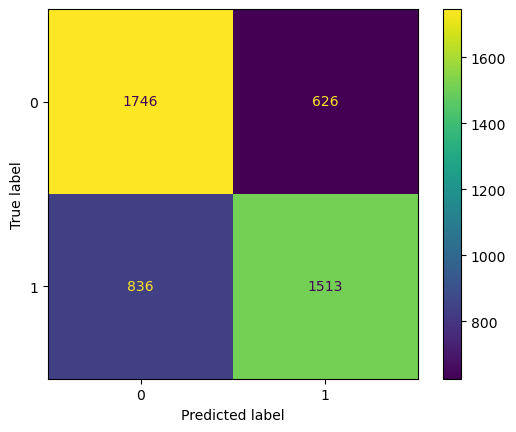

In [257]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=6)
dt.fit(x_train,y_train)
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtth=accuracy_score(y_test,y_testpred)*100
dtrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtth)
print('Train accuracy:',dtrh)

## PERFORMANCE AFTER HYPERPARAMETER TUNING

In [297]:
tb=pd.DataFrame()
tb['model']=pd.Series(['lr','rf','xgb','sv','gnb','knn','adaboost','gbc','dt'])
tb['test_accuracy_tuning']=pd.Series([lrth,rfth,xgth,svth,gnbth,knnth,adth,gbcth,dtth])
tb['train_accuracy_tuning']=pd.Series([lrrh,rfrh,xgrh,svrh,gnbrh,knnrh,adrh,gbcrh,dtrh])
tb

,model,test_accuracy_tuning,train_accuracy_tuning
0,lr,68.523618,69.414435
1,rf,72.760008,100.000000
2,xgb,74.115653,77.376305
3,sv,70.557085,76.568316
4,gnb,69.349714,70.049932
5,knn,69.730989,100.000000
6,adaboost,74.645202,75.624149
7,gbc,74.454565,77.657739
8,dt,69.031985,72.010894


## TEST AND TRAIN ACCURACIES

In [321]:
tb=pd.DataFrame()
tb['model']=pd.Series(['lr','rf','xgb','sv','gnb','knn','adaboost','gbc','dt'])
tb['test_accuracy']=pd.Series([lrt,rft,xgt,svt,gnbt,knnt,adt,gbct,dtt])
tb['train_accuracy']=pd.Series([lrr,rfr,xgr,svr,gnbr,knnr,adr,gbcr,dtr])
tb['test_accuracy_oversampling']=pd.Series([lrt1,rft1,xgt1,svt1,gnbt1,knnt1,adt1,gbct1,dtt1])
tb['train_accuracy_oversampling']=pd.Series([lrr1,rfr1,xgr1,svr1,gnbr1,knnr1,adr1,gbcr1,dtr1])
tb['test_accuracy_tuning']=pd.Series([lrth,rfth,xgth,svth,gnbth,knnth,adth,gbcth,dtth])
tb['train_accuracy_tuning']=pd.Series([lrrh,rfrh,xgrh,svrh,gnbrh,knnrh,adrh,gbcrh,dtrh])
tb

,model,test_accuracy,train_accuracy,test_accuracy_oversampling,train_accuracy_oversampling,test_accuracy_tuning,train_accuracy_tuning
0,lr,68.523618,69.414435,68.523618,69.414435,68.523618,69.414435
1,rf,67.761068,96.650023,67.761068,96.650023,72.760008,100.000000
2,xgb,72.993010,93.499773,74.115653,77.376305,74.115653,77.376305
3,sv,70.662995,77.766682,70.662995,77.766682,70.557085,76.568316
4,gnb,69.349714,70.049932,69.349714,70.049932,69.349714,70.049932
5,knn,63.863588,81.670449,63.863588,81.670449,69.730989,100.000000
6,adaboost,67.739886,68.969587,67.739886,68.969587,74.645202,75.624149
7,gbc,73.014192,75.242851,73.014192,75.242851,74.454565,77.657739
8,dt,65.664054,100.000000,65.600508,100.000000,69.031985,72.010894


In [404]:
import joblib

In [406]:
import joblib
joblib.dump(adaboost,'Employee_attrition_data.pkl')

['Employee_attrition_data.pkl']

In [408]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [410]:
joblib.dump(le,'le.pkl')

['le.pkl']

In [412]:
joblib.dump(le1,'le1.pkl')

['le1.pkl']

In [414]:
joblib.dump(le2,'le2.pkl')

['le2.pkl']

In [416]:
joblib.dump(le3,'le3.pkl')

['le3.pkl']

In [418]:
joblib.dump(le4,'le4.pkl')

['le4.pkl']

In [420]:
joblib.dump(le5,'le5.pkl')

['le5.pkl']

In [422]:
joblib.dump(le6,'le6.pkl')

['le6.pkl']

In [424]:
joblib.dump(le7,'le7.pkl')

['le7.pkl']

In [426]:
joblib.dump(le8,'le8.pkl')

['le8.pkl']

In [428]:
joblib.dump(le9,'le9.pkl')

['le9.pkl']

In [430]:
joblib.dump(le10,'le10.pkl')

['le10.pkl']

In [432]:
joblib.dump(le11,'le11.pkl')

['le11.pkl']

In [434]:
joblib.dump(le12,'le12.pkl')

['le12.pkl']

In [436]:
joblib.dump(le13,'le13.pkl')

['le13.pkl']

In [438]:
joblib.dump(le14,'le14.pkl')

['le14.pkl']

In [440]:
joblib.dump(le15,'le15.pkl')

['le15.pkl']